In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [44]:
df.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [45]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [46]:
# fill publisher with mode

df["Publisher"] = df["Publisher"].fillna(df["Publisher"].mode()[0])

# fill year with median

df["Year"] = df["Year"].fillna(df["Year"].median())

In [47]:
df.isnull().sum() # now no empty values

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [48]:
df.duplicated().sum() # no duplicates to drop

np.int64(0)

In [49]:
# year converted to int

df["Year"] = df["Year"].astype(int)

In [50]:
df.sample(4)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1926,1928,Pro Evolution Soccer 2008,X360,2007,Sports,Konami Digital Entertainment,0.08,0.90,0.04,0.05,1.07
6389,6391,Jikkyou Powerful Pro Yakyuu '98 Ketteiban,PS,1998,Sports,Konami Digital Entertainment,0.00,0.00,0.25,0.02,0.27
14663,14666,The Settlers II 10th Anniversary,PC,2006,Action,Ubisoft,0.00,0.02,0.00,0.00,0.03
16110,16113,DoDonPachi Saidaioujou,X360,2013,Shooter,Cave,0.00,0.00,0.01,0.00,0.01


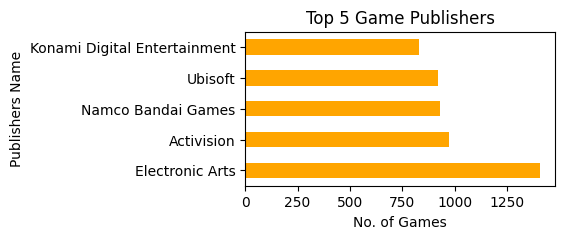

In [51]:
# the top 5 publishers

top_5_year = df.groupby(by="Publisher")["Name"].count().nlargest(5)
top_5_year

plt.figure(figsize = (4 , 2))
top_5_year.plot(kind="barh", color="orange")
plt.title('Top 5 Game Publishers')
plt.xlabel('No. of Games')
plt.ylabel('Publishers Name')
plt.show()

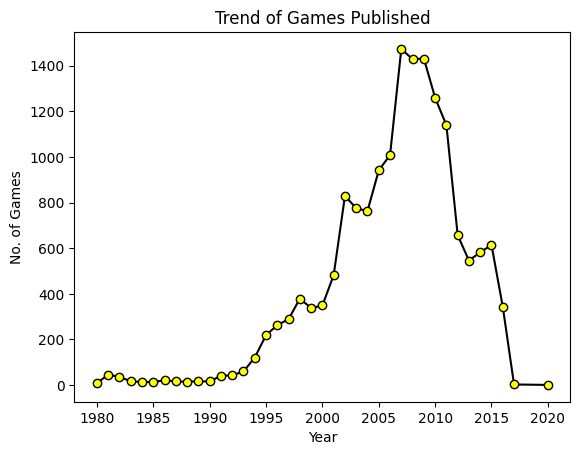

In [52]:
# trend noticed over year in games published

trend_overyears = df.groupby(by="Year")["Name"].count()
trend_overyears[:7]

trend_overyears.plot(kind="line",marker="o", color="black", markerfacecolor="yellow")
plt.title('Trend of Games Published')
plt.xlabel('Year')
plt.ylabel('No. of Games')
plt.show()

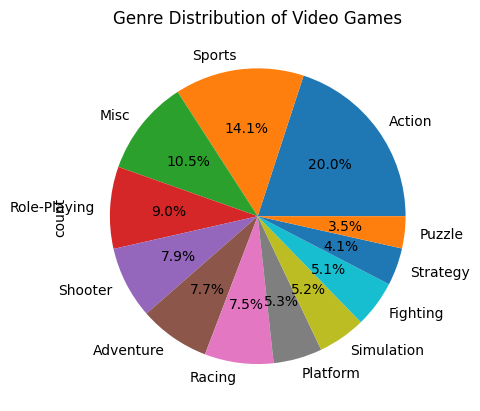

In [53]:
# genre distribution pie chart

genre_count = df["Genre"].value_counts()
genre_count

genre_count.plot(kind="pie", autopct='%.1f%%')
plt.title("Genre Distribution of Video Games")
plt.show()

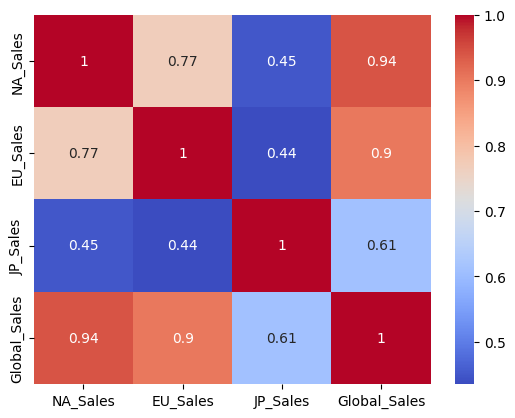

In [54]:
correlation_matrix = df[["NA_Sales","EU_Sales","JP_Sales","Global_Sales"]].corr()
correlation_matrix

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [55]:
df.sample(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1365,1367,Tomb Raider (2013),PS4,2014,Action,Square Enix,0.47,0.64,0.06,0.25,1.41
4494,4496,Tetris Axis,3DS,2011,Puzzle,Tetris Online,0.20,0.13,0.06,0.03,0.43
4186,4188,Bomberman Hero,N64,1998,Platform,Nintendo,0.27,0.06,0.08,0.05,0.47


In [56]:
# as the year range is too huge
# created a deaced column 
df['Decade'] = (df['Year'] // 10) * 10 


In [57]:
# pivot table of genre and decades with values of global sales

pvt_table = df.pivot_table(index="Decade", columns="Genre", values="Global_Sales")
pvt_table

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Decade,,,,,,,,,,,,
1980,0.775455,2.390000,1.810000,1.056250,3.705152,3.301579,1.512500,1.694444,1.993000,0.170000,1.403478,NaN
1990,0.859815,0.461959,0.639637,0.547759,1.671280,0.549155,0.821858,1.072791,0.503285,0.605233,0.482138,0.466911
2000,0.538356,0.199379,0.520132,0.475209,0.657712,0.324441,0.541080,0.563258,0.596029,0.472377,0.570932,0.209718
2010,0.467708,0.112431,0.416650,0.422824,0.799272,0.183103,0.528590,0.547885,1.171646,0.339904,0.569825,0.213690
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290000,NaN,NaN


C:\Users\Unnati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


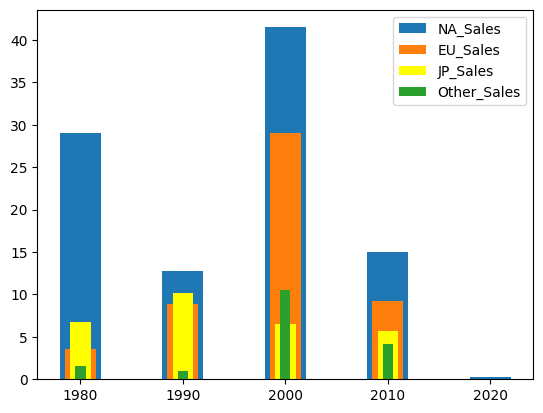

In [58]:
# stack chart for NA,EU,JP,Other sales

plt.bar(df["Decade"],df["NA_Sales"], label="NA_Sales", width=4)
plt.bar(df["Decade"],df["EU_Sales"], label="EU_Sales", width=3)
plt.bar(df["Decade"],df["JP_Sales"], label="JP_Sales", width=2, color="yellow")
plt.bar(df["Decade"],df["Other_Sales"], label="Other_Sales", width=1)

plt.legend()
plt.show()

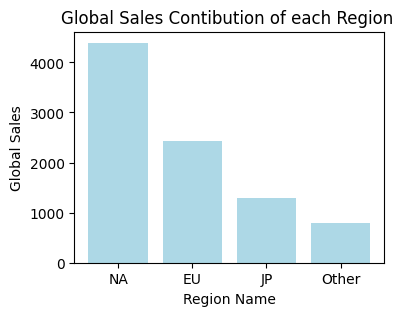

In [59]:
# which region contributes most to global sales

na_total = df["NA_Sales"].sum()
eu_total = df["EU_Sales"].sum()
jp_total = df["JP_Sales"].sum()
other_total = df["Other_Sales"].sum()

regions = ["NA", "EU", "JP","Other"]
values = [na_total, eu_total, jp_total,other_total]

plt.figure(figsize= (4, 3))
plt.bar(regions, values, color="lightblue")
plt.title('Global Sales Contibution of each Region ')
plt.xlabel('Region Name')
plt.ylabel('Global Sales')
plt.show()

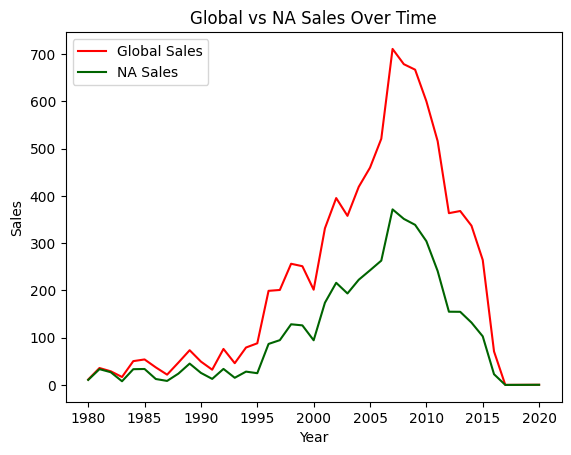

In [60]:
# Global Sales vs NA Sales over the years
# sorting required so that line goes year wise(1990-2000-2020-2025)

diff= df.groupby("Year")[["Global_Sales", "NA_Sales"]].sum().sort_index()

plt.plot(diff.index, diff["Global_Sales"], label="Global Sales", color="red")
plt.plot(diff.index, diff["NA_Sales"], label="NA Sales", color="darkgreen")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Global vs NA Sales Over Time")
plt.show()

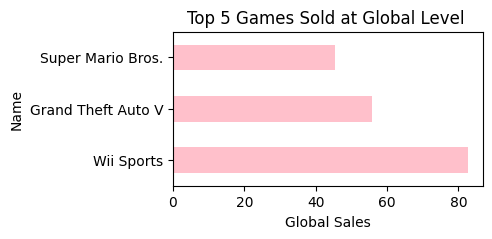

In [61]:
# which game sold the most at global level

highest_sold_game = df.groupby(by="Name")["Global_Sales"].sum().nlargest(3)
highest_sold_game

plt.figure(figsize = (4 , 2))
highest_sold_game.plot(kind="barh",color="pink")
plt.title('Top 5 Games Sold at Global Level ')
plt.xlabel('Global Sales')
plt.show()

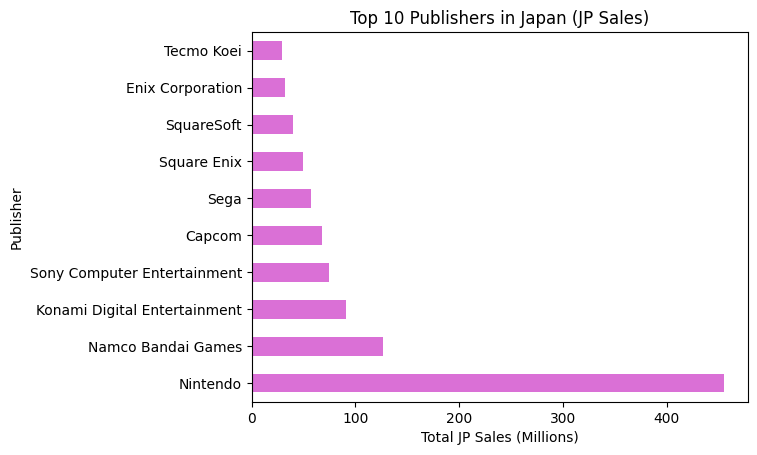

In [ ]:
# Which publishers dominate regional markets (NA/EU/JP) in JP

top_jp = df.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).nlargest(10)

top_jp.plot(kind='barh', color='orchid')
plt.title("Top 10 Publishers in Japan (JP Sales)")
plt.xlabel("Total JP Sales")
plt.ylabel("Publisher")
plt.show()